This notebook generates a numpy file containing the indices (rows) of the min/max frequencies in the spectrogram data for each class. This file is used for data augmentation. Specify the path to a class-meta.csv file.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os 
os.chdir('/content/drive/Shareddrives/AC297r Project - RFCx /code')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os
import pandas as pd
import librosa
import numpy as np
from specinput import params

# path to class-meta.csv file
path = './class-meta.csv' 

# amount to expand each class' frequency band by on either side
buffer_hertz = 1000


In [5]:
params.mel_bands

224

In [6]:
params.mel_min_hz

50.0

In [7]:
params.mel_max_hz

24000.0

In [8]:
# get a vector of frequencies corresponding to the spectrogram rows based on the specinput.py params
melfreqs = librosa.mel_frequencies(n_mels=params.mel_bands, fmin=params.mel_min_hz, fmax=params.mel_max_hz)


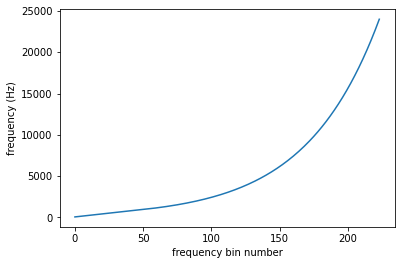

In [9]:
import matplotlib.pyplot as plt
plt.plot(melfreqs)
plt.xlabel('frequency bin number')
plt.ylabel('frequency (Hz)');


In [11]:
# compute min/max frequency indices
df = pd.read_csv(path, index_col=0)
spf = []
for i in sorted(list(set(df['Class']))):
    spf.append([i.replace(' ',''),
               np.argmin(np.abs(melfreqs-np.min(df[df['Class']==i]['Min Frequency (Hz)']-buffer_hertz))), 
               np.argmin(np.abs(melfreqs-np.max(df[df['Class']==i]['Max Frequency (Hz)']+buffer_hertz)))])
spf = np.stack(spf)


In [ ]:
np.save('class-freqs.npy', spf)


In [ ]:
spf

array([['Amazona_vittata', '0', '134'],
       ['Antrostomus_noctitherus', '0', '124'],
       ['Buteo_jamaicensis', '20', '138'],
       ['Buteo_platypterus', '105', '148'],
       ['Chordeiles_gundlachii', '25', '158'],
       ['Coccyzus_vieilloti', '0', '124'],
       ['Coereba_flaveola', '137', '187'],
       ['Contopus_latirostris_blancoi', '51', '134'],
       ['Crotophaga_ani', '0', '144'],
       ['Eleutherodactylus_antillensis', '92', '145'],
       ['Eleutherodactylus_brittoni', '109', '157'],
       ['Eleutherodactylus_cochranae', '105', '149'],
       ['Eleutherodactylus_cooki', '0', '120'],
       ['Eleutherodactylus_coqui', '0', '124'],
       ['Eleutherodactylus_gryllus', '138', '172'],
       ['Eleutherodactylus_hedricki', '68', '141'],
       ['Eleutherodactylus_portoricensis', '0', '131'],
       ['Eleutherodactylus_richmondi', '75', '153'],
       ['Eleutherodactylus_unicolor', '95', '149'],
       ['Eleutherodactylus_wightmanae', '97', '140'],
       ['Geotrygon_mon